## Course Code: DS4003
## Course Name: Principles and Techniques for Data Science
## Lab Session: 06 - Anomaly Detection 1


#### Objectives

You will be able to: 

- Gain an understanding of how various anomaly detection algorithms operate (e.g., HBOS, LOF, COF...).
- Evaluate the results form anomaly detection.
- Confidently apply anomaly detection to new datasets

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns
import os
from IPython.display import Image

<div class='alert alert-block alert-warning' style="font-weight:bolder">
 
 ### PyOD for Anomaly Detection

</div>

PyOD is a popular Python library specifically designed for anomaly detection tasks. It provides a comprehensive collection of algorithms, utilities, and evaluation metrics to help you identify anomalous data points in your datasets. You can read more here (https://pyod.readthedocs.io/en/latest/).

Key Features of PyOD:

- Diverse Algorithms: PyOD offers a wide range of outlier detection algorithms, including:
- Evaluation Metrics: PyOD provides various metrics to evaluate the performance of your outlier detection models, such as precision, recall, ROC and etc.
- Visualization Tools: The library includes functions for visualizing outlier detection results, helping you understand the performance of your models and identify potential outliers.
- Compatibility: PyOD is compatible with popular machine learning libraries like scikit-learn, making it easy to integrate with your existing workflows.
- To install pyod : use pip install pyod
- To import pyod: use import pyod

# Read the Red Wine csv

In [3]:
red = pd.read_csv('winequality-red.csv',  sep=';')
red = red.dropna()
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Task1: Plot histogram for all the columns

<Axes: xlabel='chlorides', ylabel='Count'>

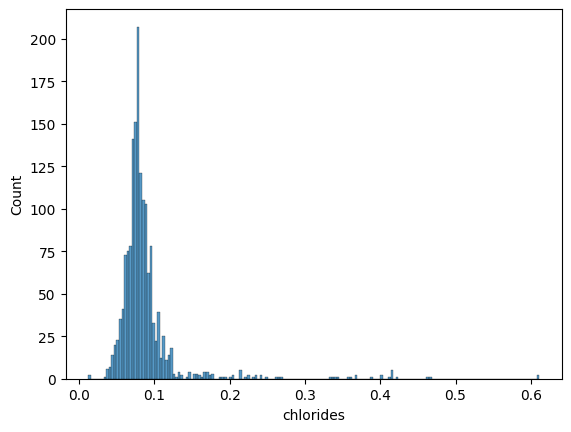

In [4]:
sns.histplot(red['chlorides'])

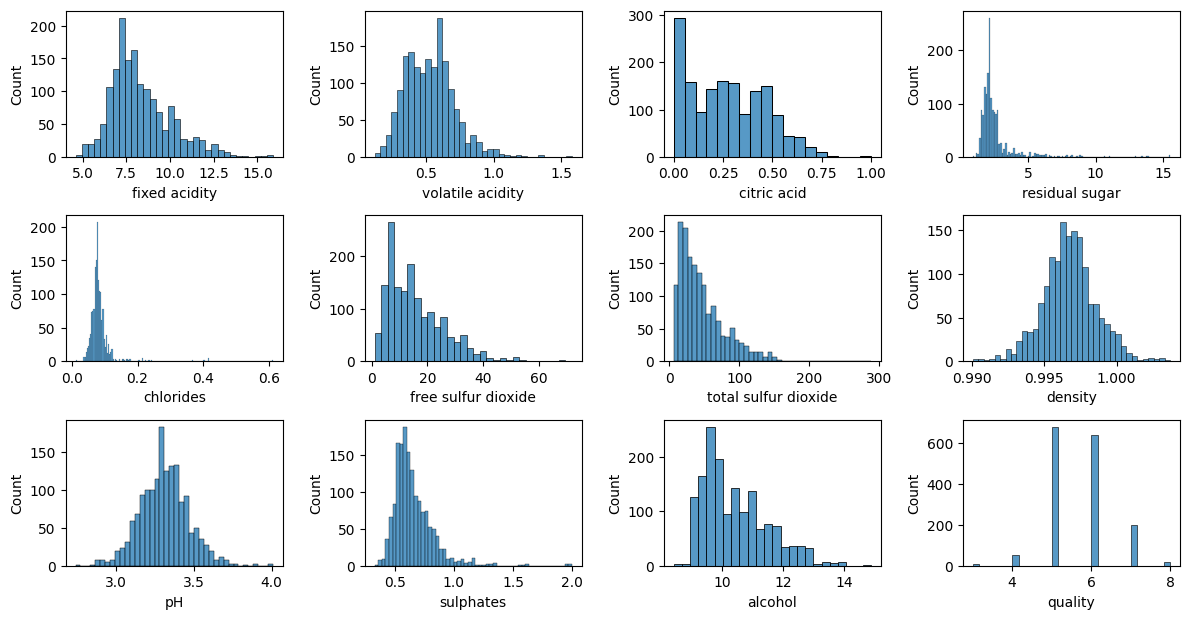

In [5]:
cols = red.columns 

plt.figure(figsize=(12, len(cols)))
n_cols = int(np.ceil(len(cols) / 2))
for i, col in enumerate(cols): 
    plt.subplot(n_cols, 4, i+1)
    sns.histplot(red[col])
plt.tight_layout()
plt.show()

# HBOS 

In [6]:
from pyod.models.hbos import HBOS 
from pyod.utils.utility import standardizer 
from pyod.utils.example import visualize
from pyod.utils.data import evaluate_print 

In [7]:
sliced_data = red[['fixed acidity', 'sulphates']]

# Task2: Apply HBOS on sliced data, experiment with different hyper parameters
Once you have found a good hyper params, use it on the whole dataframe 

In [8]:
from sklearn.decomposition import PCA
std_data = standardizer(red)
pca = PCA(n_components=2)
data = pd.DataFrame(pca.fit_transform(std_data), columns=['PC1', 'PC2']) # 99.4427% of the variance explained
data.head()

,PC1,PC2
0,-1.779442,1.157303
1,-1.004185,2.071838
2,-0.915783,1.393434
3,2.404077,-0.213792
4,-1.779442,1.157303


In [9]:
clf = HBOS(n_bins='auto', contamination=0.0663, alpha=0.0001)
clf.fit(data)

HBOS(alpha=0.0001, contamination=0.0663, n_bins='auto', tol=0.5)

### Here we visualize the labels derived from the anomaly detction model

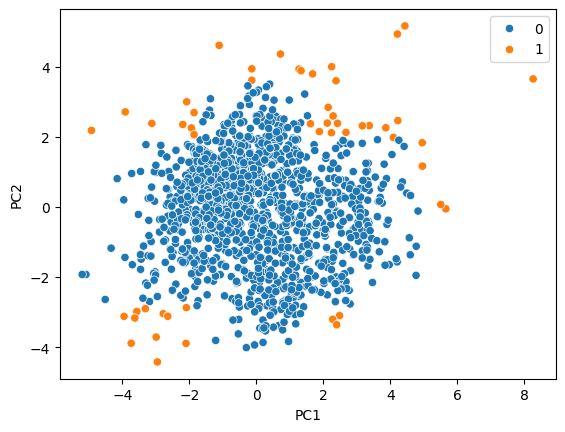

In [10]:
sns.scatterplot(data=data, x='PC1', y='PC2', hue=clf.labels_)
plt.show()

### Alternatively, we can also visualize the anomaly score. 

In [11]:
hbos = clf.decision_scores_ 

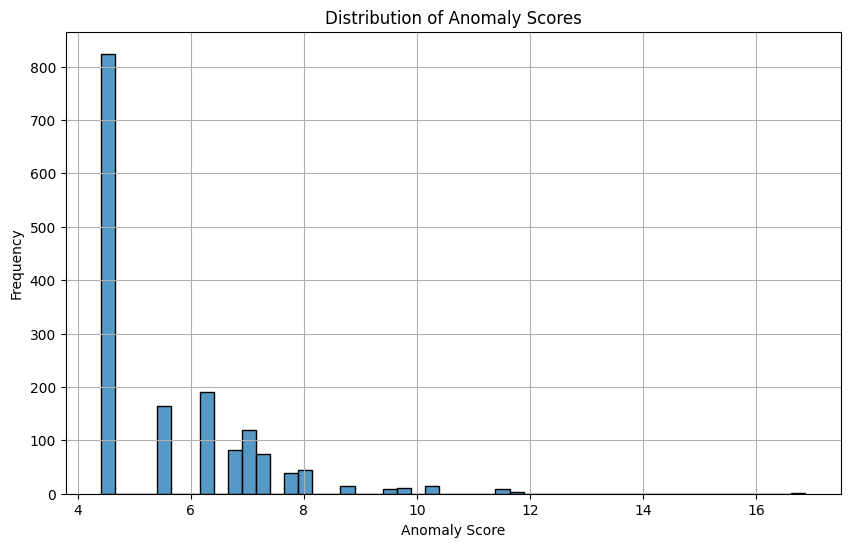

In [12]:

plt.figure(figsize=(10, 6))
sns.histplot(hbos, bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### We can also visualize the dataset based on the anomaly scores.

9.714311172124102


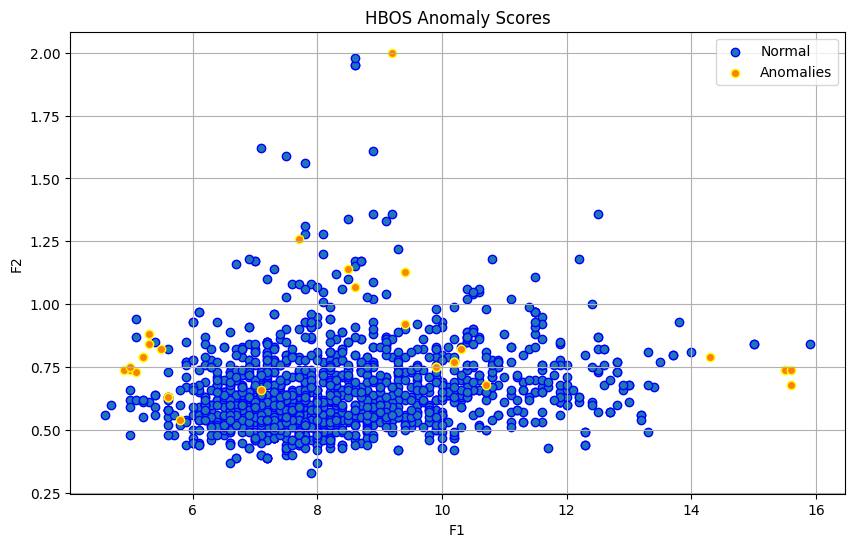

In [13]:

cont_level = 0.02 
threshold_index = int(len(hbos) * (1 - cont_level)) 
threshold = np.sort(hbos)[threshold_index]  
print(threshold)
plt.figure(figsize=(10, 6))

plt.scatter(sliced_data[hbos < threshold].iloc[:, 0], 
            sliced_data[hbos < threshold].iloc[:, 1], 
            label='Normal', edgecolors='blue')

plt.scatter(sliced_data[hbos >= threshold].iloc[:, 0], 
            sliced_data[hbos >= threshold].iloc[:, 1], 
            label='Anomalies', edgecolors='yellow')

plt.title('HBOS Anomaly Scores')
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.grid()
plt.show()


# Task3: Apply KNN based outlier detector on sliced data, experiment with different hyper parameters

In [14]:
from pyod.models.knn import KNN 

<Axes: xlabel='fixed acidity', ylabel='sulphates'>

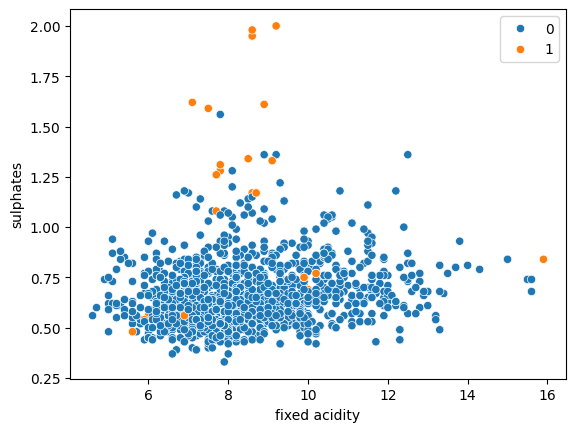

In [15]:
clf = KNN(n_neighbors=50, method='mean', metric='euclidean', contamination=0.02)
clf.fit(std_data)
sns.scatterplot(data=sliced_data, x='fixed acidity', y='sulphates', hue=clf.labels_)

# Task4: Apply LOF on sliced data, experiment with different hyper parameters


<Axes: xlabel='fixed acidity', ylabel='sulphates'>

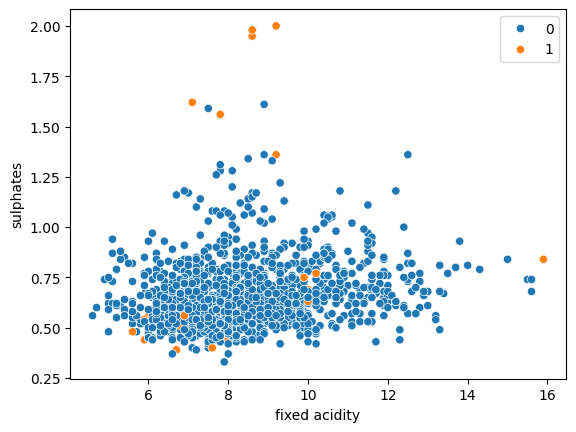

In [18]:
from pyod.models.lof import LOF
clf = LOF(n_neighbors=30,  metric='manhattan', contamination=0.02)
clf.fit(std_data)
sns.scatterplot(data=sliced_data, x='fixed acidity', y='sulphates', hue=clf.labels_)

# Task5: Apply COF on sliced data, experiment with different hyper parameters

<Axes: xlabel='fixed acidity', ylabel='sulphates'>

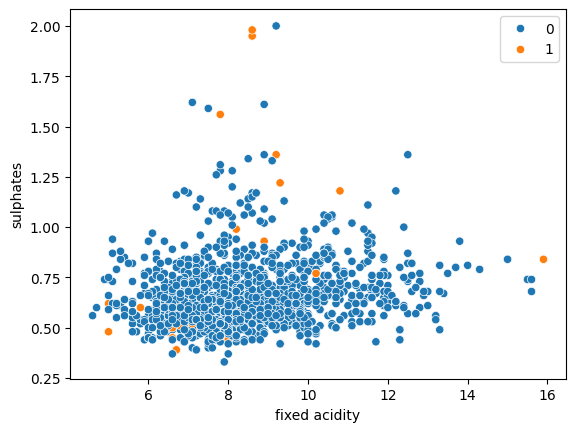

In [19]:
from pyod.models.cof import COF
clf = COF(n_neighbors=60, contamination=0.02)
clf.fit(std_data)
sns.scatterplot(data=sliced_data, x='fixed acidity', y='sulphates', hue=clf.labels_)

# Task6: Once you are done with red wine, run the outlier detectors on the white wine dataset

In [20]:
white = pd.read_csv('winequality-white.csv', sep=';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
